In [116]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [117]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [118]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, column, text
from sqlalchemy import inspect

In [119]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [120]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)
Base.classes.keys()
# reflect the tables


['measurement', 'station']

In [121]:
# View all of the classes that automap found


In [122]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [123]:
# Create our session (link) from Python to the DB
conn = engine.connect()

In [124]:
session = Session(engine)

# Exploratory Precipitation Analysis

In [125]:
inspector = inspect(engine)

In [126]:
# Find the most recent date in the data set.
columns1 = inspector.get_columns('measurement')
columns2 = inspector.get_columns('station')
print (columns1)
print (columns2)

[{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}, {'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}]
[{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}, {'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 

In [127]:
for c in columns1:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [128]:
for c in columns2:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [129]:
most_recent = session.query(measurement.date).order_by(measurement.date.desc()).first()

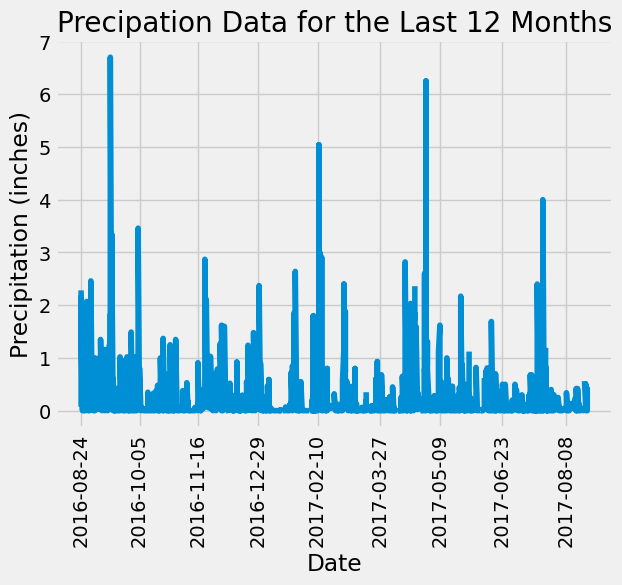

In [130]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# last12months = session.query(measurement.prcp).\
#     filter(measurement.date > '2016-08-23').\
#     order_by(measurement.date).all()

# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
one_year_ago = pd.to_datetime(most_recent) - pd.DateOffset(years=1)

# Perform a query to retrieve the data and precipitation scores
last12months = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date > '2016-08-23').\
    order_by(measurement.date).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
last12months_df = pd.DataFrame(last12months, columns=['date', 'precipitation'])

# Sort the dataframe by date
last12months_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(last12months_df['date'], last12months_df['precipitation'])
tick_labels = last12months_df.iloc[::270,0].tolist()
plt.xticks(tick_labels, rotation=90)
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.title("Precipation Data for the Last 12 Months")
plt.show()


In [131]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary = last12months_df['precipitation'].describe()
summary_df = pd.DataFrame(summary)
summary_df

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [132]:
# Design a query to calculate the total number of stations in the dataset
station_number = session.query(func.count(func.distinct(measurement.station))).scalar()
station_number

9

In [133]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active = session.query(measurement.station, func.count(measurement.station)).\
                group_by(measurement.station).\
                order_by(func.count(measurement.station).desc()).all()
most_active


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [134]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_stats = session.query(measurement.station, 
                            func.min(measurement.tobs), 
                            func.max(measurement.tobs), 
                            func.avg(measurement.tobs)).\
                filter(measurement.station == most_active[0][0]).all()
most_active_stats

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[(77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), (66.0,), 

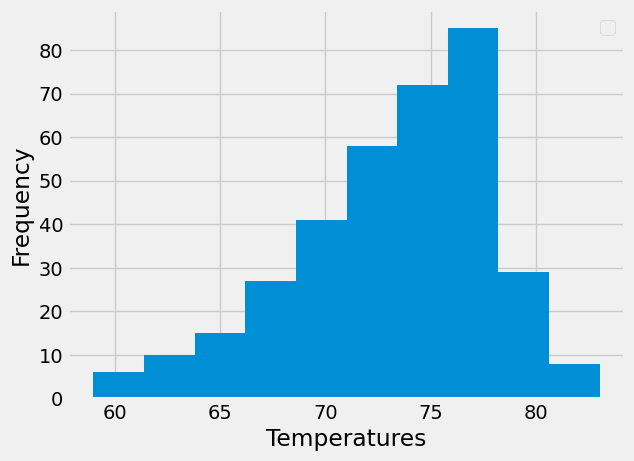

In [135]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(measurement.tobs).\
          filter(measurement.station == 'USC00519281').\
          filter(measurement.date > '2016-08-23').all()
print(results)

temps = list(np.ravel(results))

# # Plot the results as a histogram
plt.hist(temps)
plt.xlabel("Temperatures")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Close Session

In [136]:
# Close Session
session.close()